# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('/kaggle/input/titanictestdataset/tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic.shape

(418, 12)

In [4]:
titanic.size

5016

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Data Visualization**

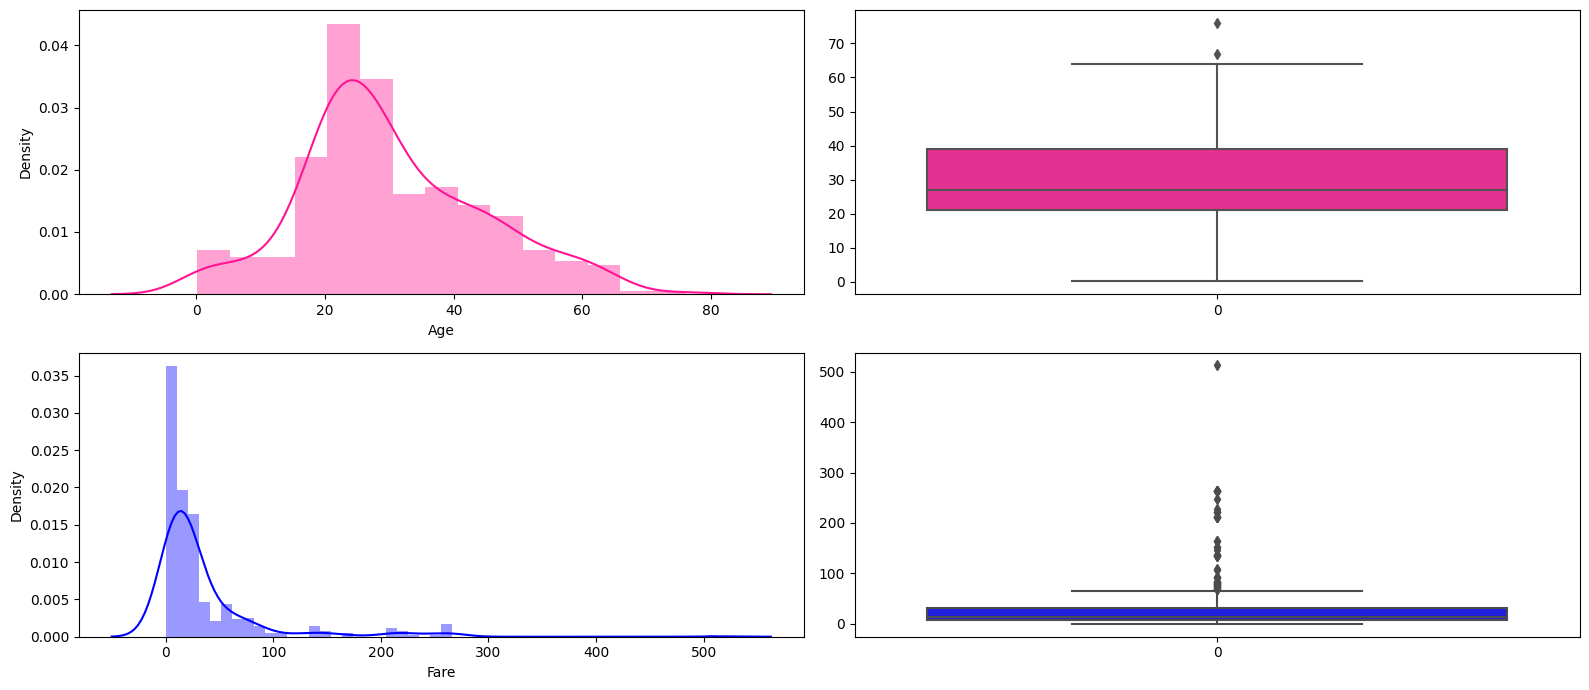

In [6]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(titanic['Age'],color='DeepPink')
plt.subplot(2,2,2)
sns.boxplot(titanic['Age'],color='DeepPink')

plt.subplot(2,2,3)
sns.distplot(titanic['Fare'],color='Blue')
plt.subplot(2,2,4)
sns.boxplot(titanic['Fare'],color='Blue')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sex')

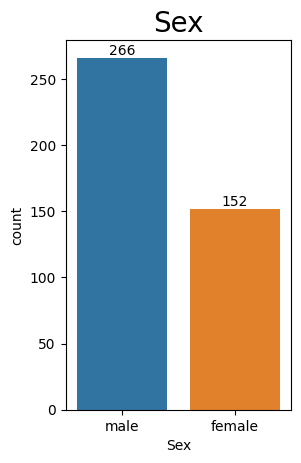

In [7]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)


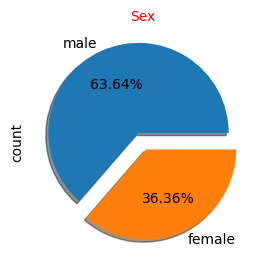

In [8]:
ax =plt.subplot(1,2,2)
ax=titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

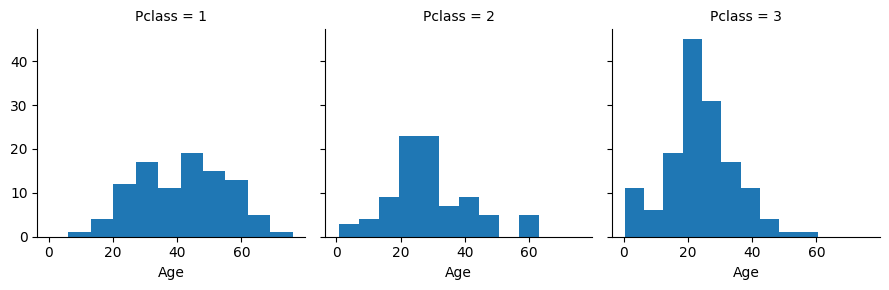

In [9]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

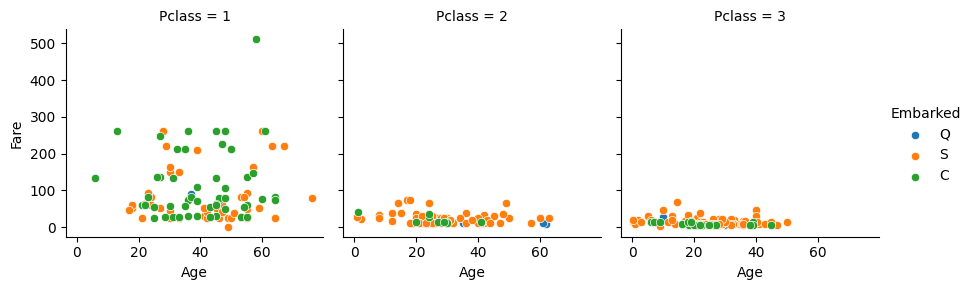

In [10]:
g = sns.FacetGrid(titanic, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

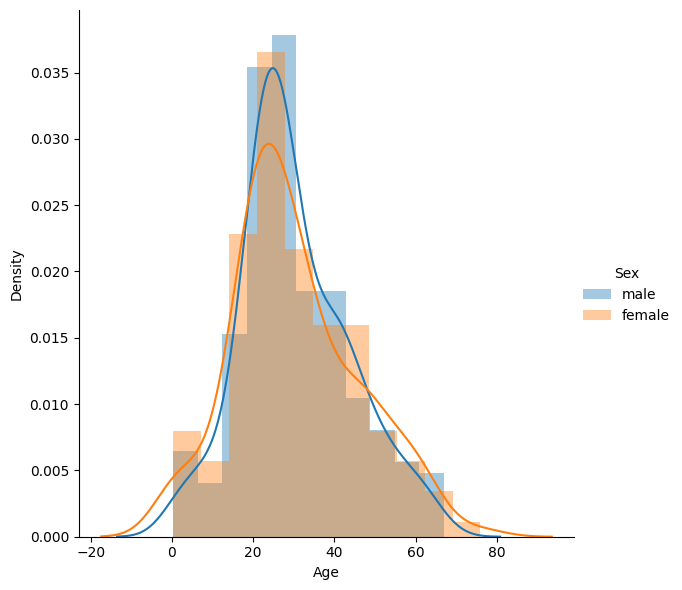

In [11]:
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

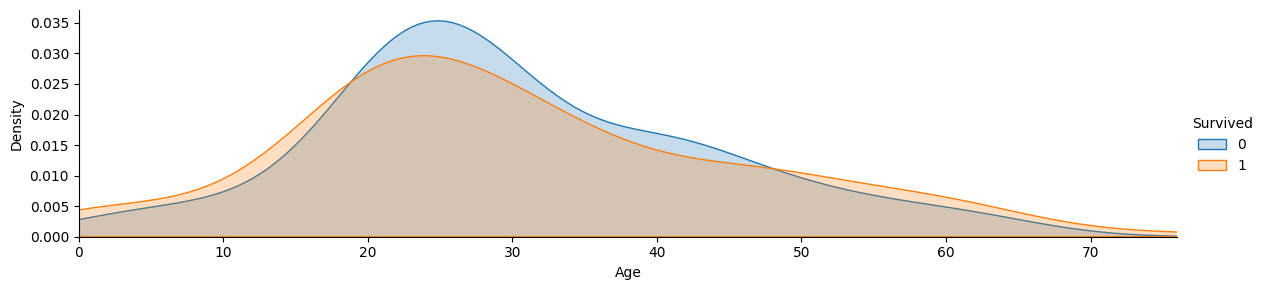

In [12]:
fig = sns.FacetGrid(titanic, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

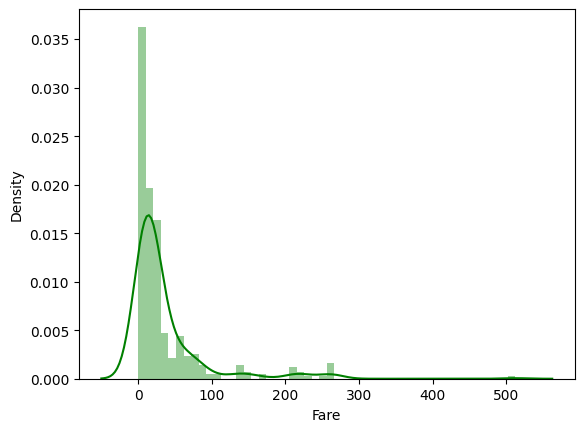

In [13]:
sns.distplot(titanic['Fare'],color="g")
plt.show()

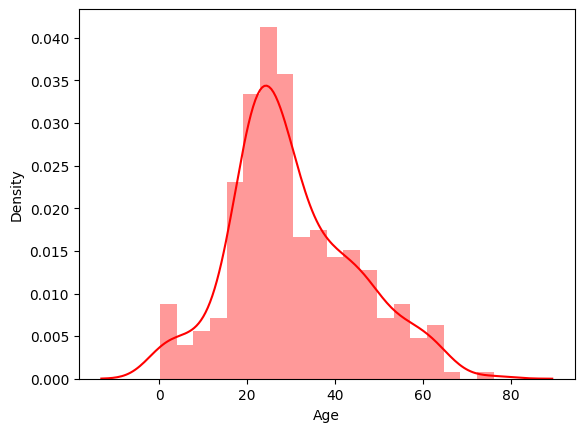

In [14]:
sns.distplot(titanic['Age'],color="r",bins=20,kde=True,)
plt.show()

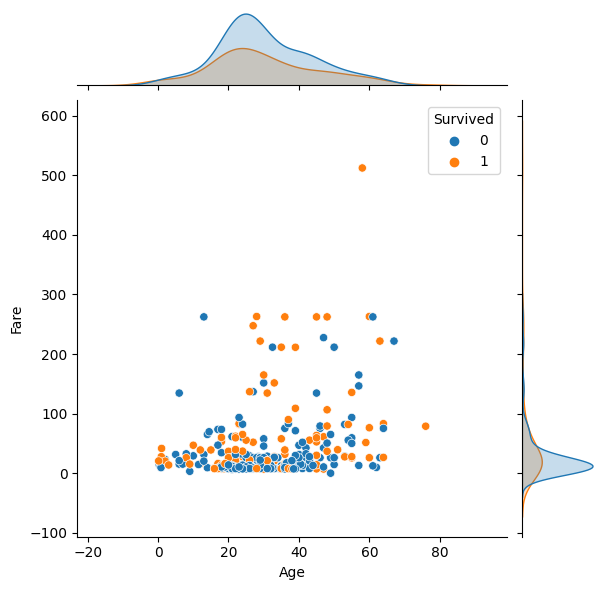

In [15]:
sns.jointplot(x="Age",y="Fare",data=titanic,color="olive",hue="Survived")
plt.show()

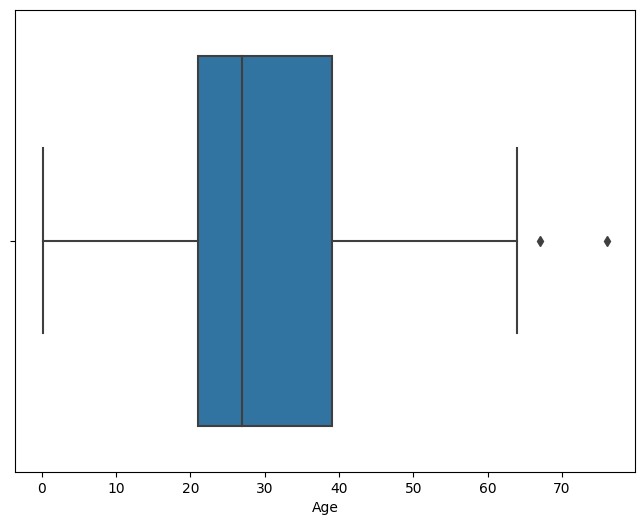

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=titanic["Age"])
plt.show()

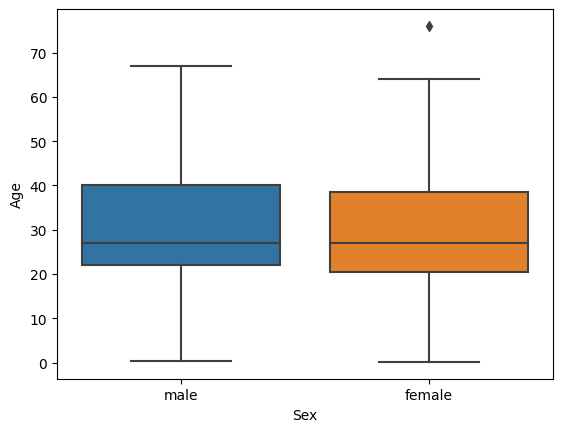

In [17]:
sns.boxplot(x='Sex', y = 'Age',data= titanic)
plt.show()

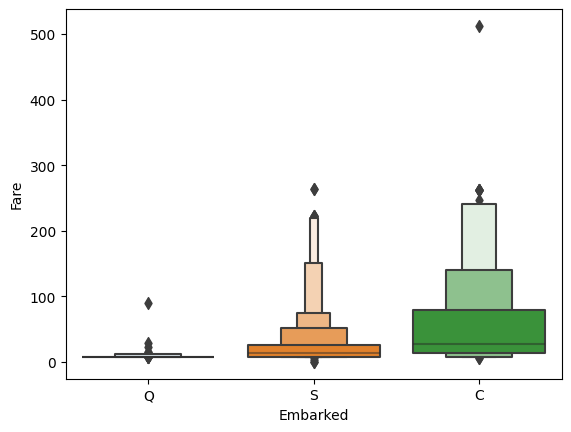

In [18]:
sns.boxenplot(y="Fare", x="Embarked", data=titanic)
plt.show()

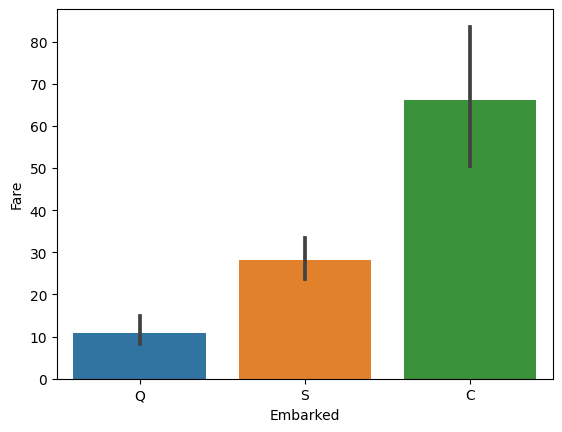

In [19]:
sns.barplot(y='Fare',x='Embarked',data=titanic)
plt.show()

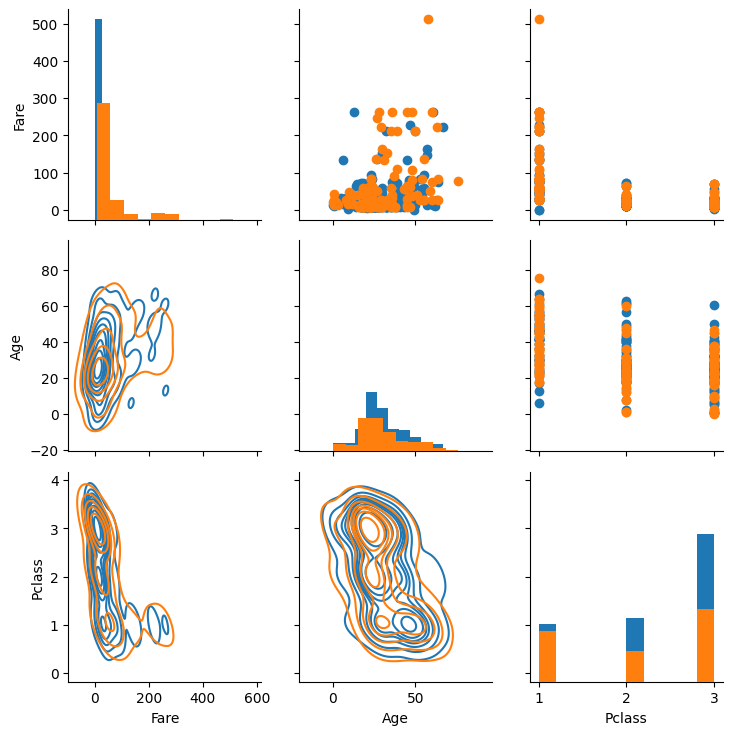

In [20]:
titanic_g = sns.PairGrid(titanic,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

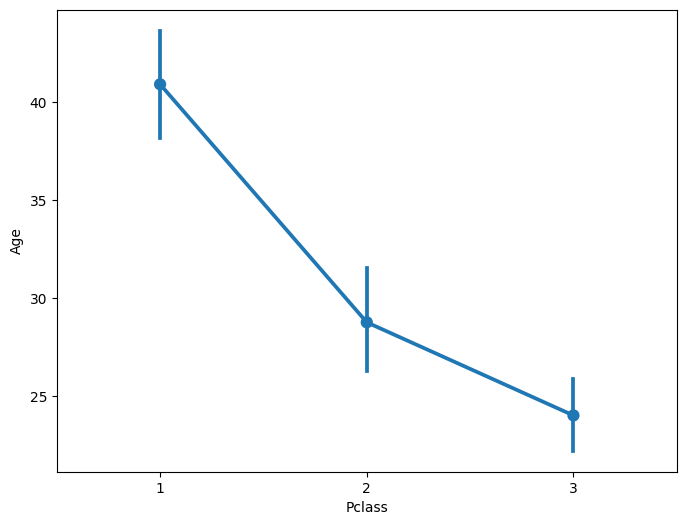

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="Pclass", y="Age", data=titanic)
plt.show()

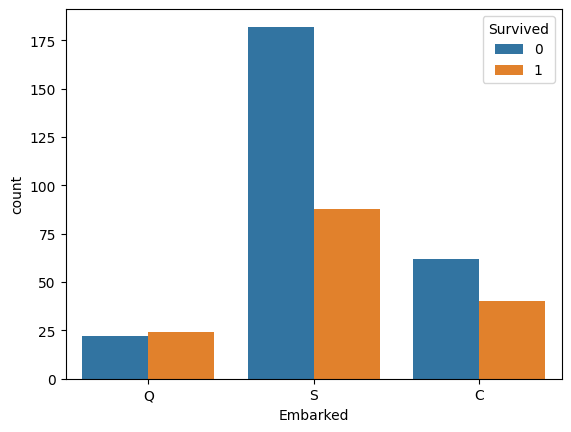

In [22]:
sns.countplot(data = titanic,x= 'Embarked',hue='Survived')
plt.show()

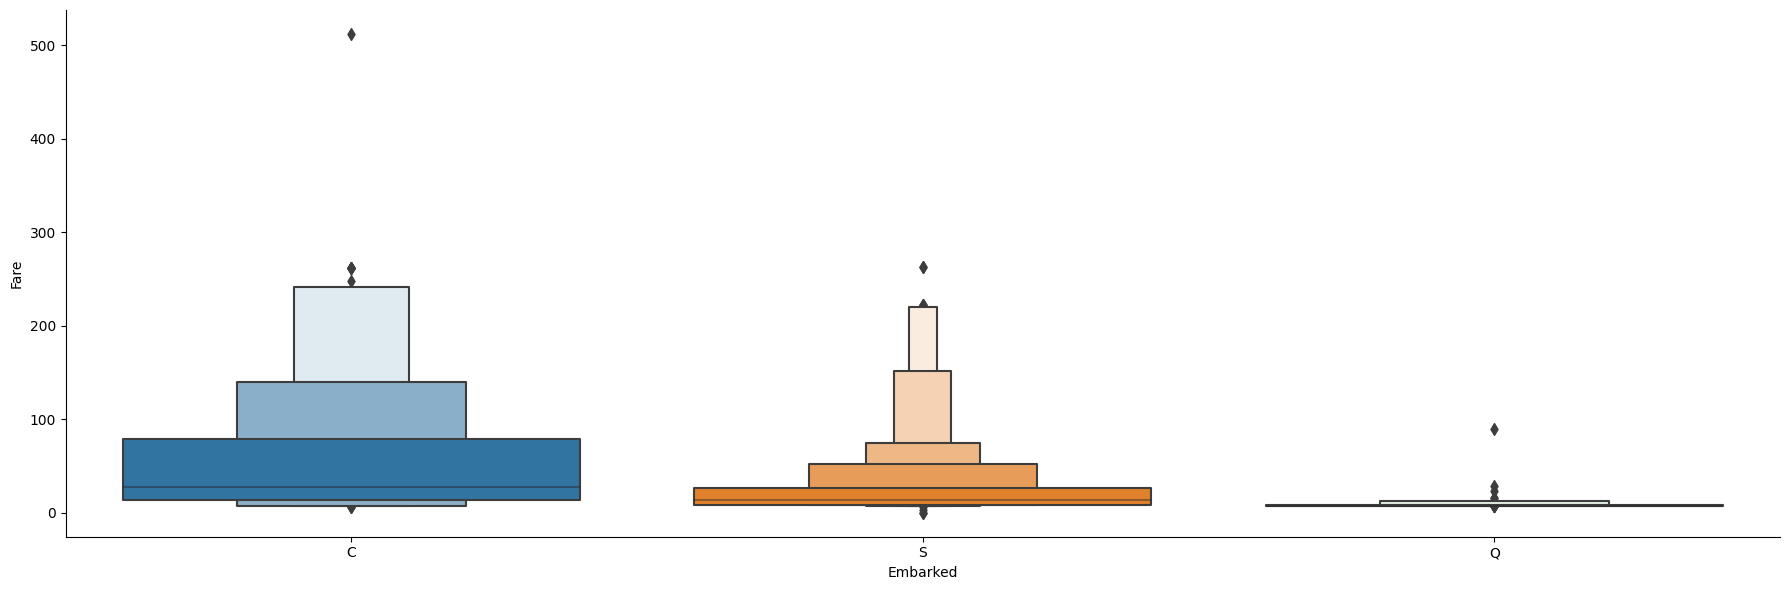

In [23]:
sns.catplot(y = "Fare", x = "Embarked", data = titanic.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

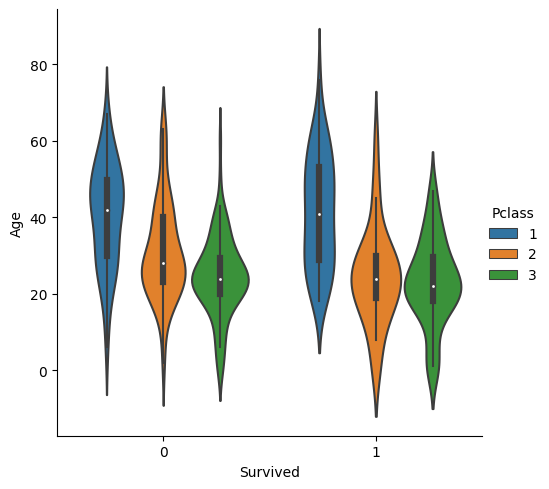

In [24]:
sns.catplot(data=titanic,x='Survived',y='Age',hue='Pclass',kind="violin")
plt.show()

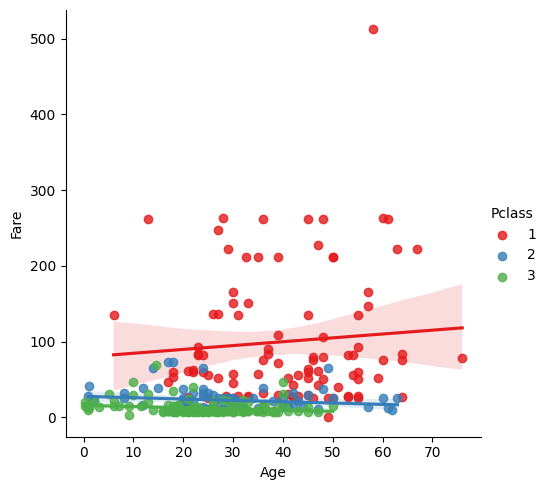

In [25]:
g= sns.lmplot(x="Age", y="Fare", hue="Pclass", data=titanic, palette="Set1")

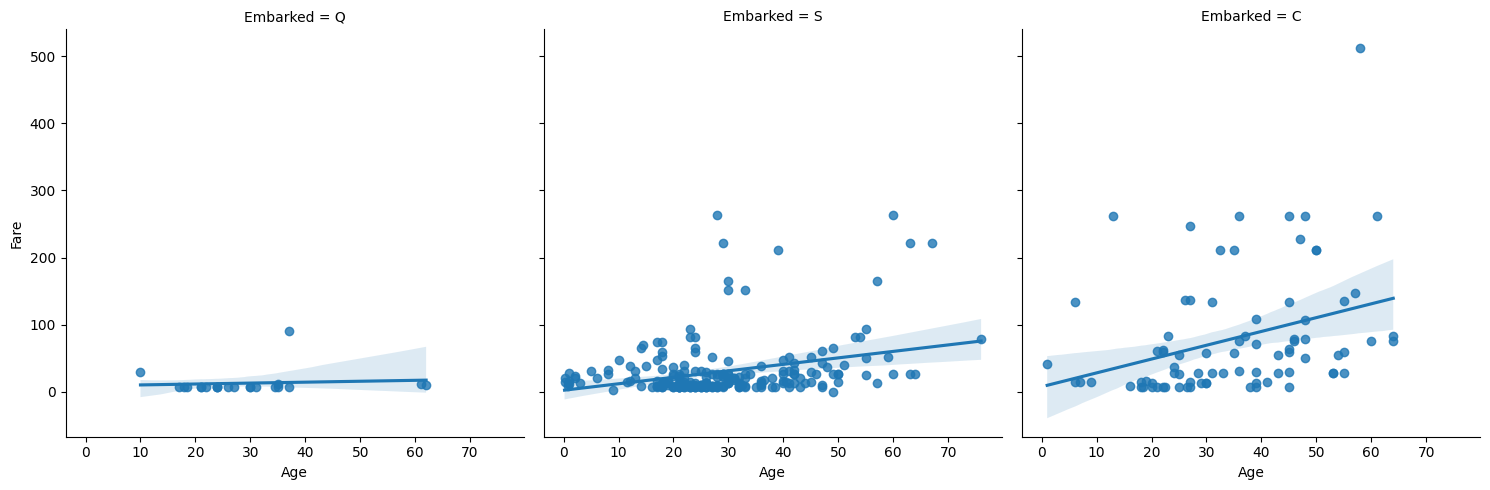

In [26]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=titanic)

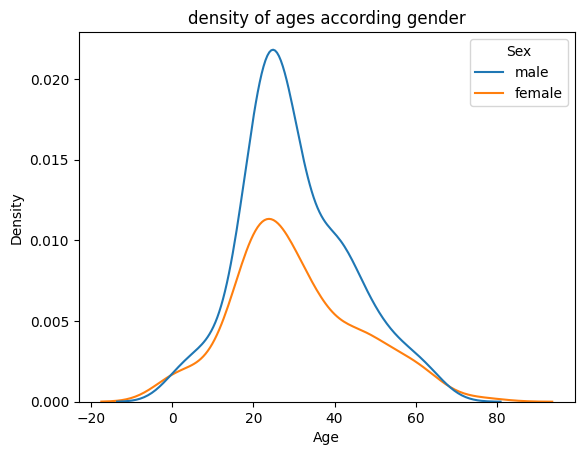

In [27]:
sns.kdeplot(data = titanic , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

**Data Preprocessing**

In [28]:
## Finding the Null value in data
titanic.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [29]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [30]:
missing(titanic)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


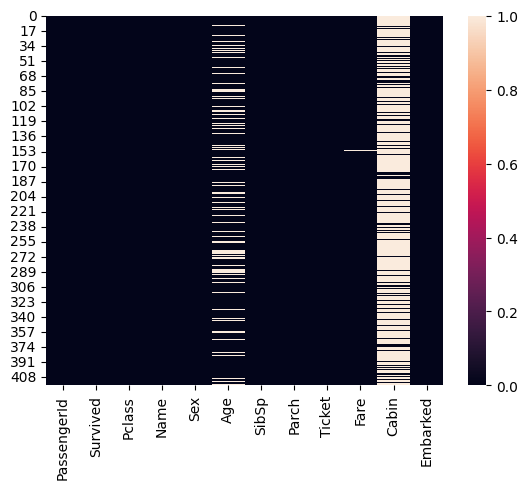

In [31]:
sns.heatmap(titanic.isnull());

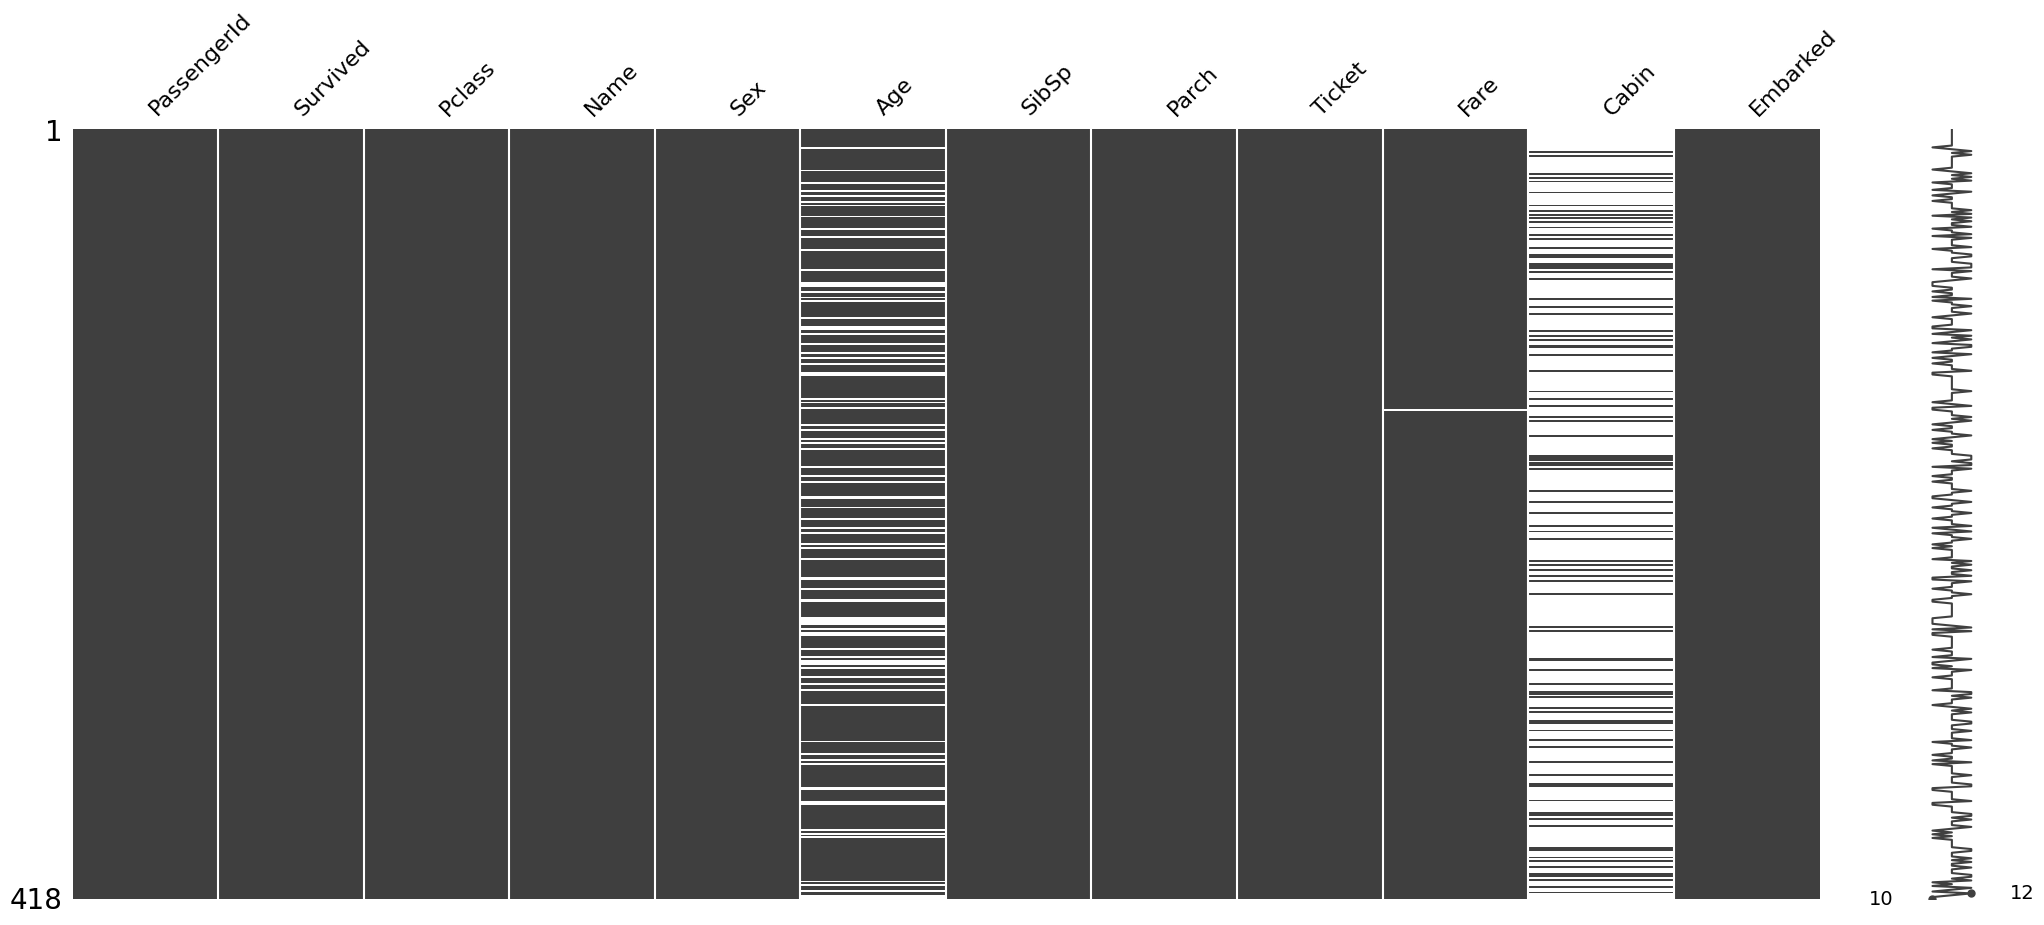

In [32]:
import missingno as msno
msno.matrix(titanic)
plt.show()

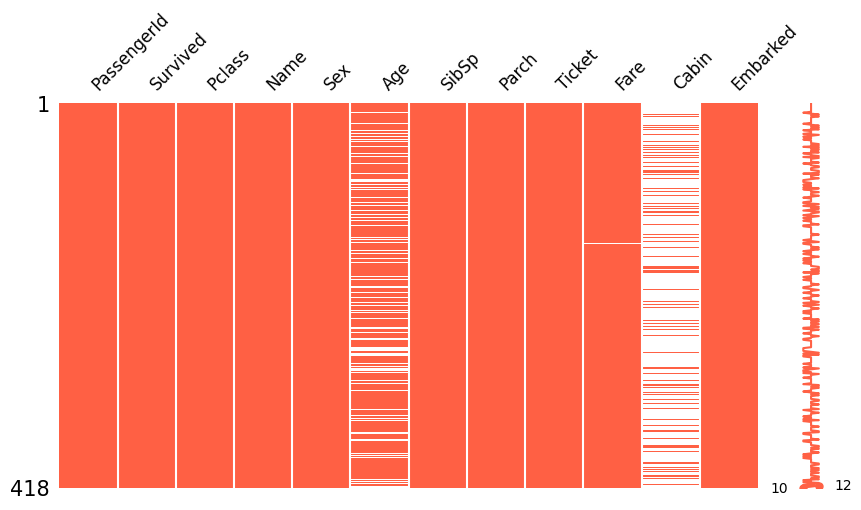

In [33]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

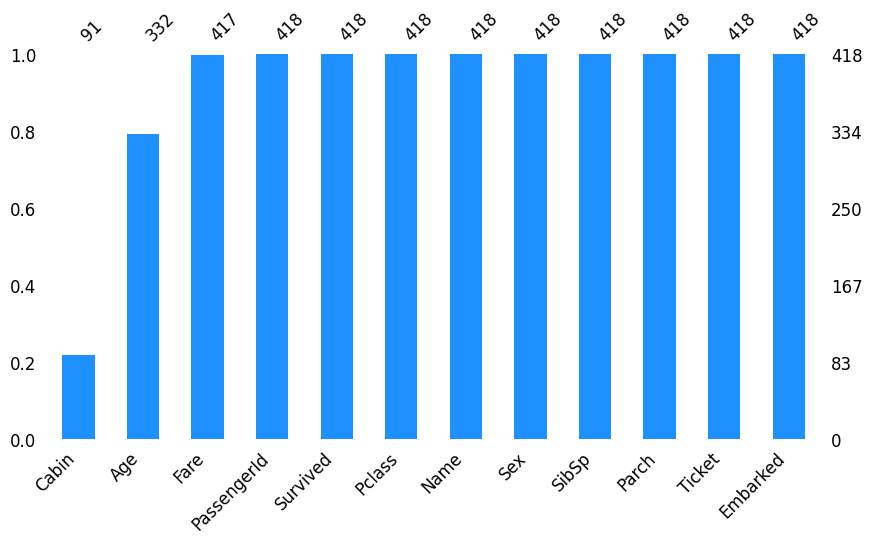

In [34]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [35]:
# Removing the null values

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [36]:
# Drop the columns 

titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


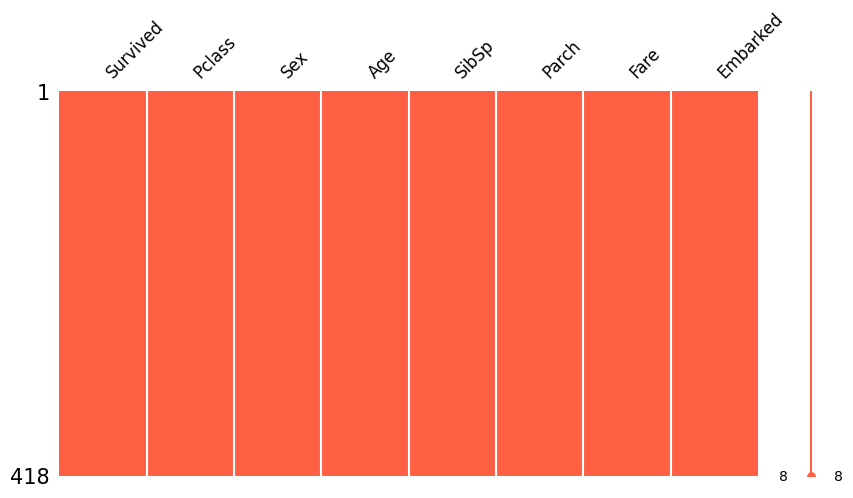

In [37]:
import missingno
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

In [38]:
# Converting the categorical variable into the numerical variable by using category_encoder

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


**Data Split**

In [39]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [41]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00,0,2,83.1583,3
201,1,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,1,1,17.00,2,0,8.0500,2
214,1,2,38.00,4,2,7.7750,2


In [42]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
55,1,1,10.0,4,1,29.1250,1
239,3,2,48.0,1,0,106.4250,3
224,3,2,53.0,0,0,27.4458,3
376,1,2,22.0,2,0,8.6625,2
176,2,2,20.0,0,0,36.7500,2


In [43]:
y_train.head()

179    1
201    0
336    0
187    0
214    1
Name: Survived, dtype: int64

In [44]:
y_test.head()

55     0
239    1
224    1
376    1
176    1
Name: Survived, dtype: int64

# Model Implementation

**Logestic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [46]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n') 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 



In [47]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')

Logistic Regression Accuracy:  100.0%


**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [50]:
print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [51]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Random Forest Classifier**

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [53]:
print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [54]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Gaussian Naive Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

In [56]:
print("Training set score: {:.2f}".format(Gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Gnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Gnb)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [57]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Gnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Gnb))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Bernoulli Naive Bayes**

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred_Bnb = Bnb.predict(X_test)

In [59]:
print("Training set score: {:.2f}".format(Bnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Bnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Bnb)))

Training set score: 0.68
Test set score: 0.63
Accuracy Score: 0.63


In [60]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Bnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Bnb))

Confusion Matrix: 
 [[65 11]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.65      0.86      0.74        76
           1       0.58      0.30      0.39        50

    accuracy                           0.63       126
   macro avg       0.61      0.58      0.57       126
weighted avg       0.62      0.63      0.60       126



**Multi Layer Perceptron**

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [62]:
print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_mlp)))

Training set score: 0.99
Test set score: 0.98
Accuracy Score: 0.98


In [63]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_mlp))
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))

Confusion Matrix: 
 [[76  0]
 [ 3 47]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.94      0.97        50

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.97       126
weighted avg       0.98      0.98      0.98       126



**K nearest neighbour**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [65]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))

Training set score: 0.72
Test set score: 0.65
Accuracy Score: 0.65


In [66]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Confusion Matrix: 
 [[67  9]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        76
           1       0.62      0.30      0.41        50

    accuracy                           0.65       126
   macro avg       0.64      0.59      0.58       126
weighted avg       0.64      0.65      0.61       126



**Extra Tree Classifier** 

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

In [68]:
print("Training set score: {:.2f}".format(et_100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(et_100.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_et_100)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [69]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_et_100))
print("Classification_Report: \n",classification_report(y_test,y_pred_et_100))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Support Vector Classifier**

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel="rbf",gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

In [71]:
print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))

Training set score: 0.96
Test set score: 0.67
Accuracy Score: 0.67


In [72]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Confusion Matrix: 
 [[72  4]
 [38 12]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.65      0.95      0.77        76
           1       0.75      0.24      0.36        50

    accuracy                           0.67       126
   macro avg       0.70      0.59      0.57       126
weighted avg       0.69      0.67      0.61       126



**Stochastic Gradient Descent**

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)


In [74]:
print("Training set score: {:.2f}".format(sgd.score(X_train, y_train)))
print("Test set score: {:.2f}".format(sgd.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_sgd)))

Training set score: 0.71
Test set score: 0.78
Accuracy Score: 0.78


In [75]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_sgd))
print("Classification_Report: \n",classification_report(y_test,y_pred_sgd))

Confusion Matrix: 
 [[56 20]
 [ 8 42]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        76
           1       0.68      0.84      0.75        50

    accuracy                           0.78       126
   macro avg       0.78      0.79      0.77       126
weighted avg       0.80      0.78      0.78       126



**Adaboost Classifier**

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [77]:
print("Training set score: {:.2f}".format(ada.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ada.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_ada)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [78]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_ada))
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Decision Tree Classifier**

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)


In [80]:
print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [81]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Gradient boosting classifier**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)



In [83]:
print("Training set score: {:.2f}".format(gbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gbm)))


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [84]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gbm))
print("Classification_Report: \n",classification_report(y_test,y_pred_gbm))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Light gbm Classifier**

In [85]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred_lgb = lgb.predict(X_test)

In [86]:
print("Training set score: {:.2f}".format(gbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lgb)))


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [87]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_lgb))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Perception Classification**

In [88]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Perceptron = Perceptron()
Perceptron.fit(X_train,y_train)
y_pred_Perceptron = Perceptron.predict(X_test)

In [89]:
print("Training set score: {:.2f}".format(Perceptron.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Perceptron.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Perceptron)))


Training set score: 0.77
Test set score: 0.83
Accuracy Score: 0.83


In [90]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Perceptron))
print("Classification_Report: \n",classification_report(y_test,y_pred_Perceptron))

Confusion Matrix: 
 [[65 11]
 [11 39]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        76
           1       0.78      0.78      0.78        50

    accuracy                           0.83       126
   macro avg       0.82      0.82      0.82       126
weighted avg       0.83      0.83      0.83       126



**Gaussian Process Classifier**

In [91]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
GPC = GaussianProcessClassifier()
GPC.fit(X_train,y_train)
y_pred_GPC = GPC.predict(X_test)


In [92]:
print("Training set score: {:.2f}".format(GPC.score(X_train, y_train)))
print("Test set score: {:.2f}".format(GPC.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_GPC)))


Training set score: 0.99
Test set score: 0.75
Accuracy Score: 0.75


In [93]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_GPC))
print("Classification_Report: \n",classification_report(y_test,y_pred_GPC))

Confusion Matrix: 
 [[64 12]
 [20 30]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        76
           1       0.71      0.60      0.65        50

    accuracy                           0.75       126
   macro avg       0.74      0.72      0.73       126
weighted avg       0.74      0.75      0.74       126



**NuSVC**

In [94]:
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
NuSVC = NuSVC(kernel = 'rbf', random_state = 0)
NuSVC.fit(X_train,y_train)
y_pred_NuSVC = NuSVC.predict(X_test)


In [95]:
print("Training set score: {:.2f}".format(NuSVC.score(X_train, y_train)))
print("Test set score: {:.2f}".format(NuSVC.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_NuSVC)))

Training set score: 0.98
Test set score: 0.98
Accuracy Score: 0.98


In [96]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_NuSVC))
print("Classification_Report: \n",classification_report(y_test,y_pred_NuSVC))

Confusion Matrix: 
 [[74  2]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        50

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



**XGBoost**

In [97]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)



In [98]:
print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgb)))


Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [99]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

